Dataset Selection

In [39]:
import pandas as pd

# Load the dataset
df = pd.read_csv('student-mat.csv',sep=';')


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Data Loading

In [44]:
# Display the first few rows
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Data Exploration

In [21]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Display column data types
print("\nData Types:\n", df.dtypes)

# Understand the dataset's size
print("\nDataset Shape:", df.shape)

Missing Values:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Data Types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher  

Data Cleaning

In [47]:
# Handle missing values (replace with median for numeric columns)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
# Remove duplicate entries
df = df.drop_duplicates()

# Verify cleaning
print("Missing Values After Cleaning:\n", df.isnull().sum())
print("\nDataset Shape After Cleaning:", df.shape)

Data Analysis Questions

In [25]:
# Calculate the average score in math (G3)
average_g3 = df['G3'].mean()
print("Average Score in Math (G3):", average_g3)

Average Score in Math (G3): 10.415189873417722


In [27]:
students_above_15 = df[df['G3'] > 15].shape[0]
print("Number of Students Who Scored Above 15 in G3:", students_above_15)

Number of Students Who Scored Above 15 in G3: 40


In [29]:
correlation = df['studytime'].corr(df['G3'])
print("Correlation Between Study Time and Final Grade (G3):", correlation)

Correlation Between Study Time and Final Grade (G3): 0.0978196896531963


In [31]:
average_g3_by_gender = df.groupby('sex')['G3'].mean()
print("Average Final Grade (G3) by Gender:\n", average_g3_by_gender)

Average Final Grade (G3) by Gender:
 sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


Data Visualization

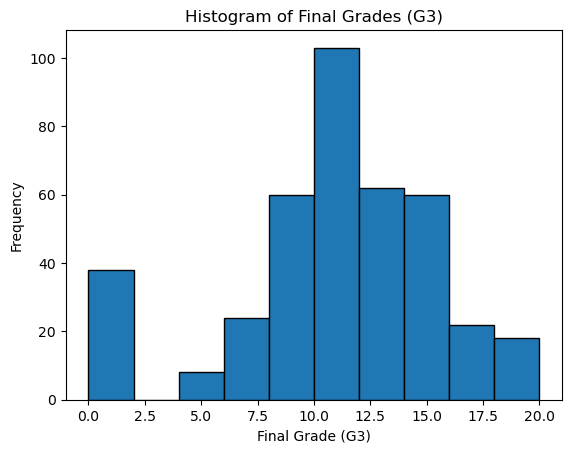

In [33]:
import matplotlib.pyplot as plt

plt.hist(df['G3'], bins=10, edgecolor='black')
plt.title('Histogram of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

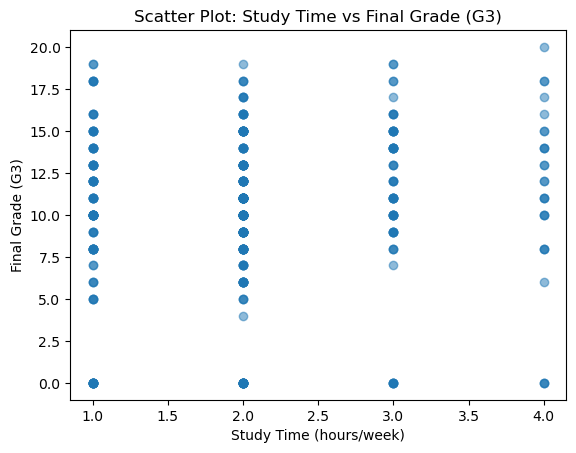

In [35]:
plt.scatter(df['studytime'], df['G3'], alpha=0.5)
plt.title('Scatter Plot: Study Time vs Final Grade (G3)')
plt.xlabel('Study Time (hours/week)')
plt.ylabel('Final Grade (G3)')
plt.show()

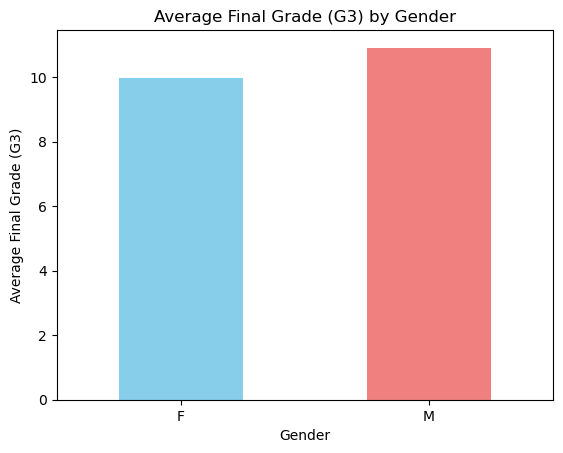

In [37]:
average_g3_by_gender.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Final Grade (G3) by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade (G3)')
plt.xticks(rotation=0)
plt.show()